# Surfer Counting with Roboflow
This is a notebook for testing out using Roboflow to count surfers.

The footage is taken from a Surfline webcam.

## Setup

In [1]:
from roboflow.hosted import HostedTest

# Create a HostedTest object
hosted_test = HostedTest(
    workspace_name="project-1-ijmz5",
    workflow_id="detect-count-and-visualize"
)

image_path = "data/surf-screenshot.png"


First, let's take a look at the image.

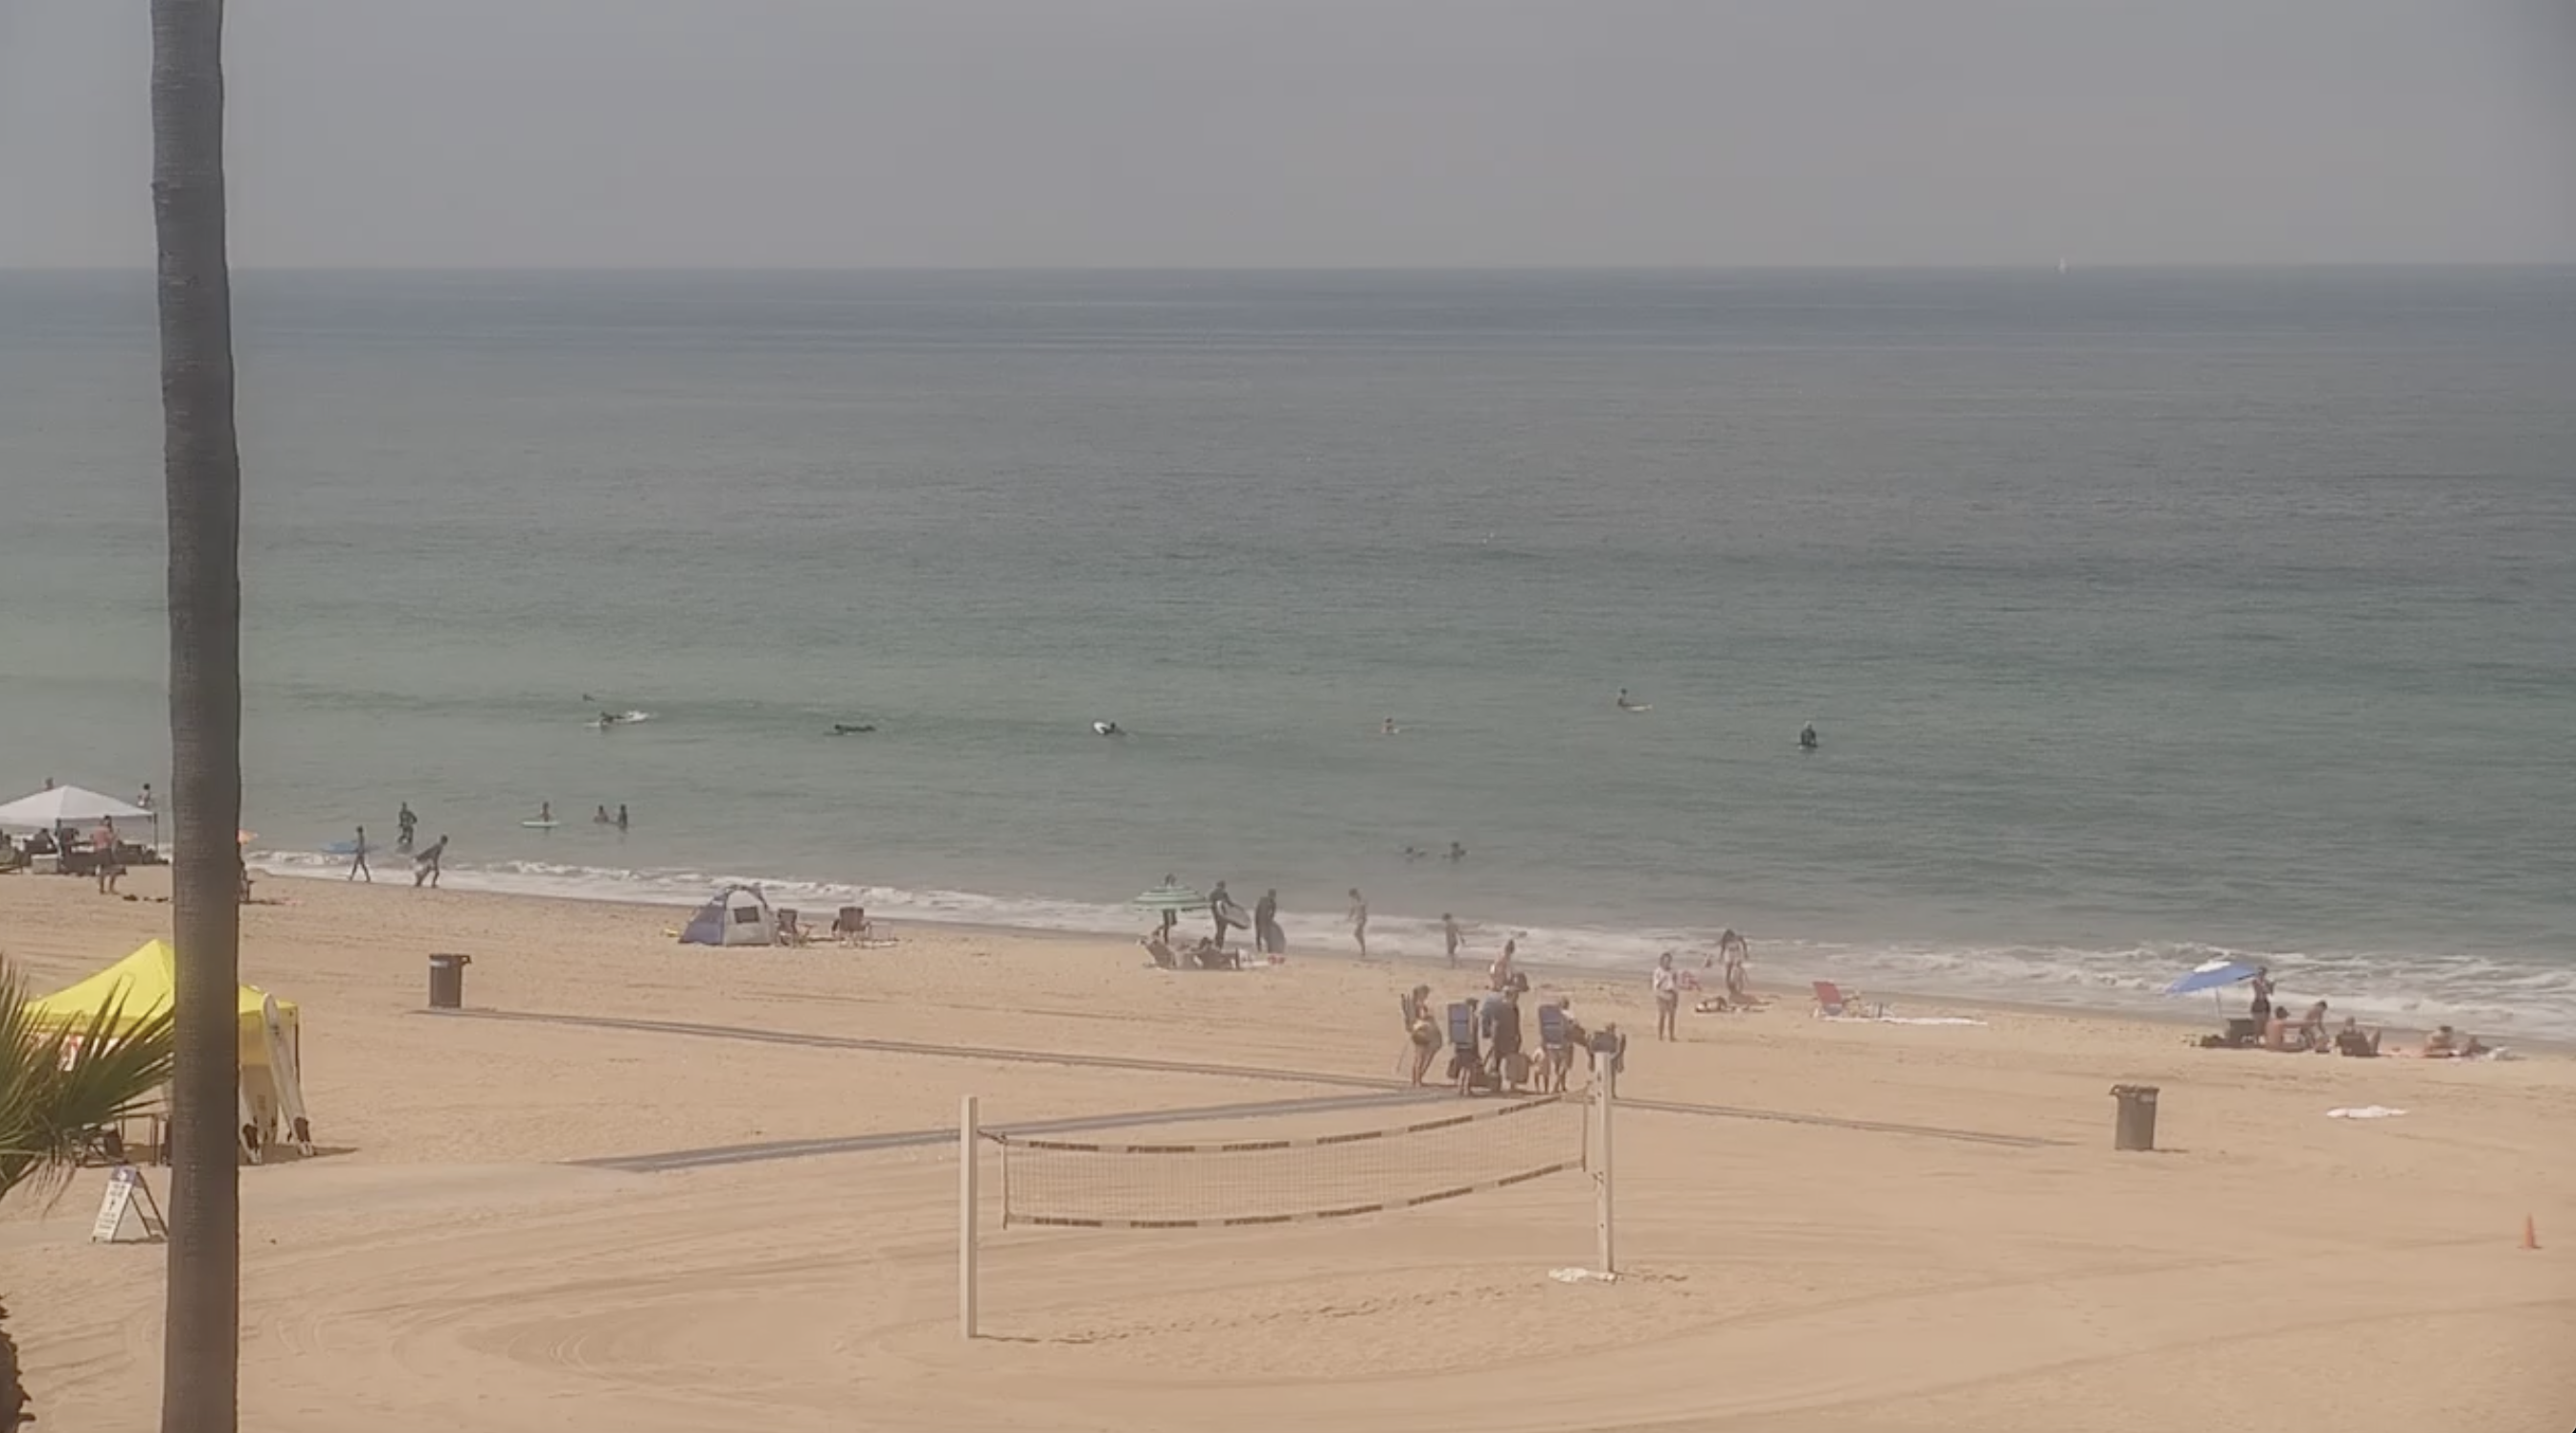

In [2]:
# display the image
from PIL import Image
from IPython.display import display
image = Image.open(image_path)
display(image)

As you can see, the image is NOT great quality. I can see size or maybe 7 surfers in the water. However, it isn't clear for a pretrained model like YOLO to know that those are people in the water. As such, I decided to fine-tune a model based on this surf footage, and I hosted a workflow on Roboflow.

## Run the workflow
Now that we've checked the image, let's test out our Roboflow workflow.

In [3]:
# Run the workflow
outputs = hosted_test.run(image_path=image_path)

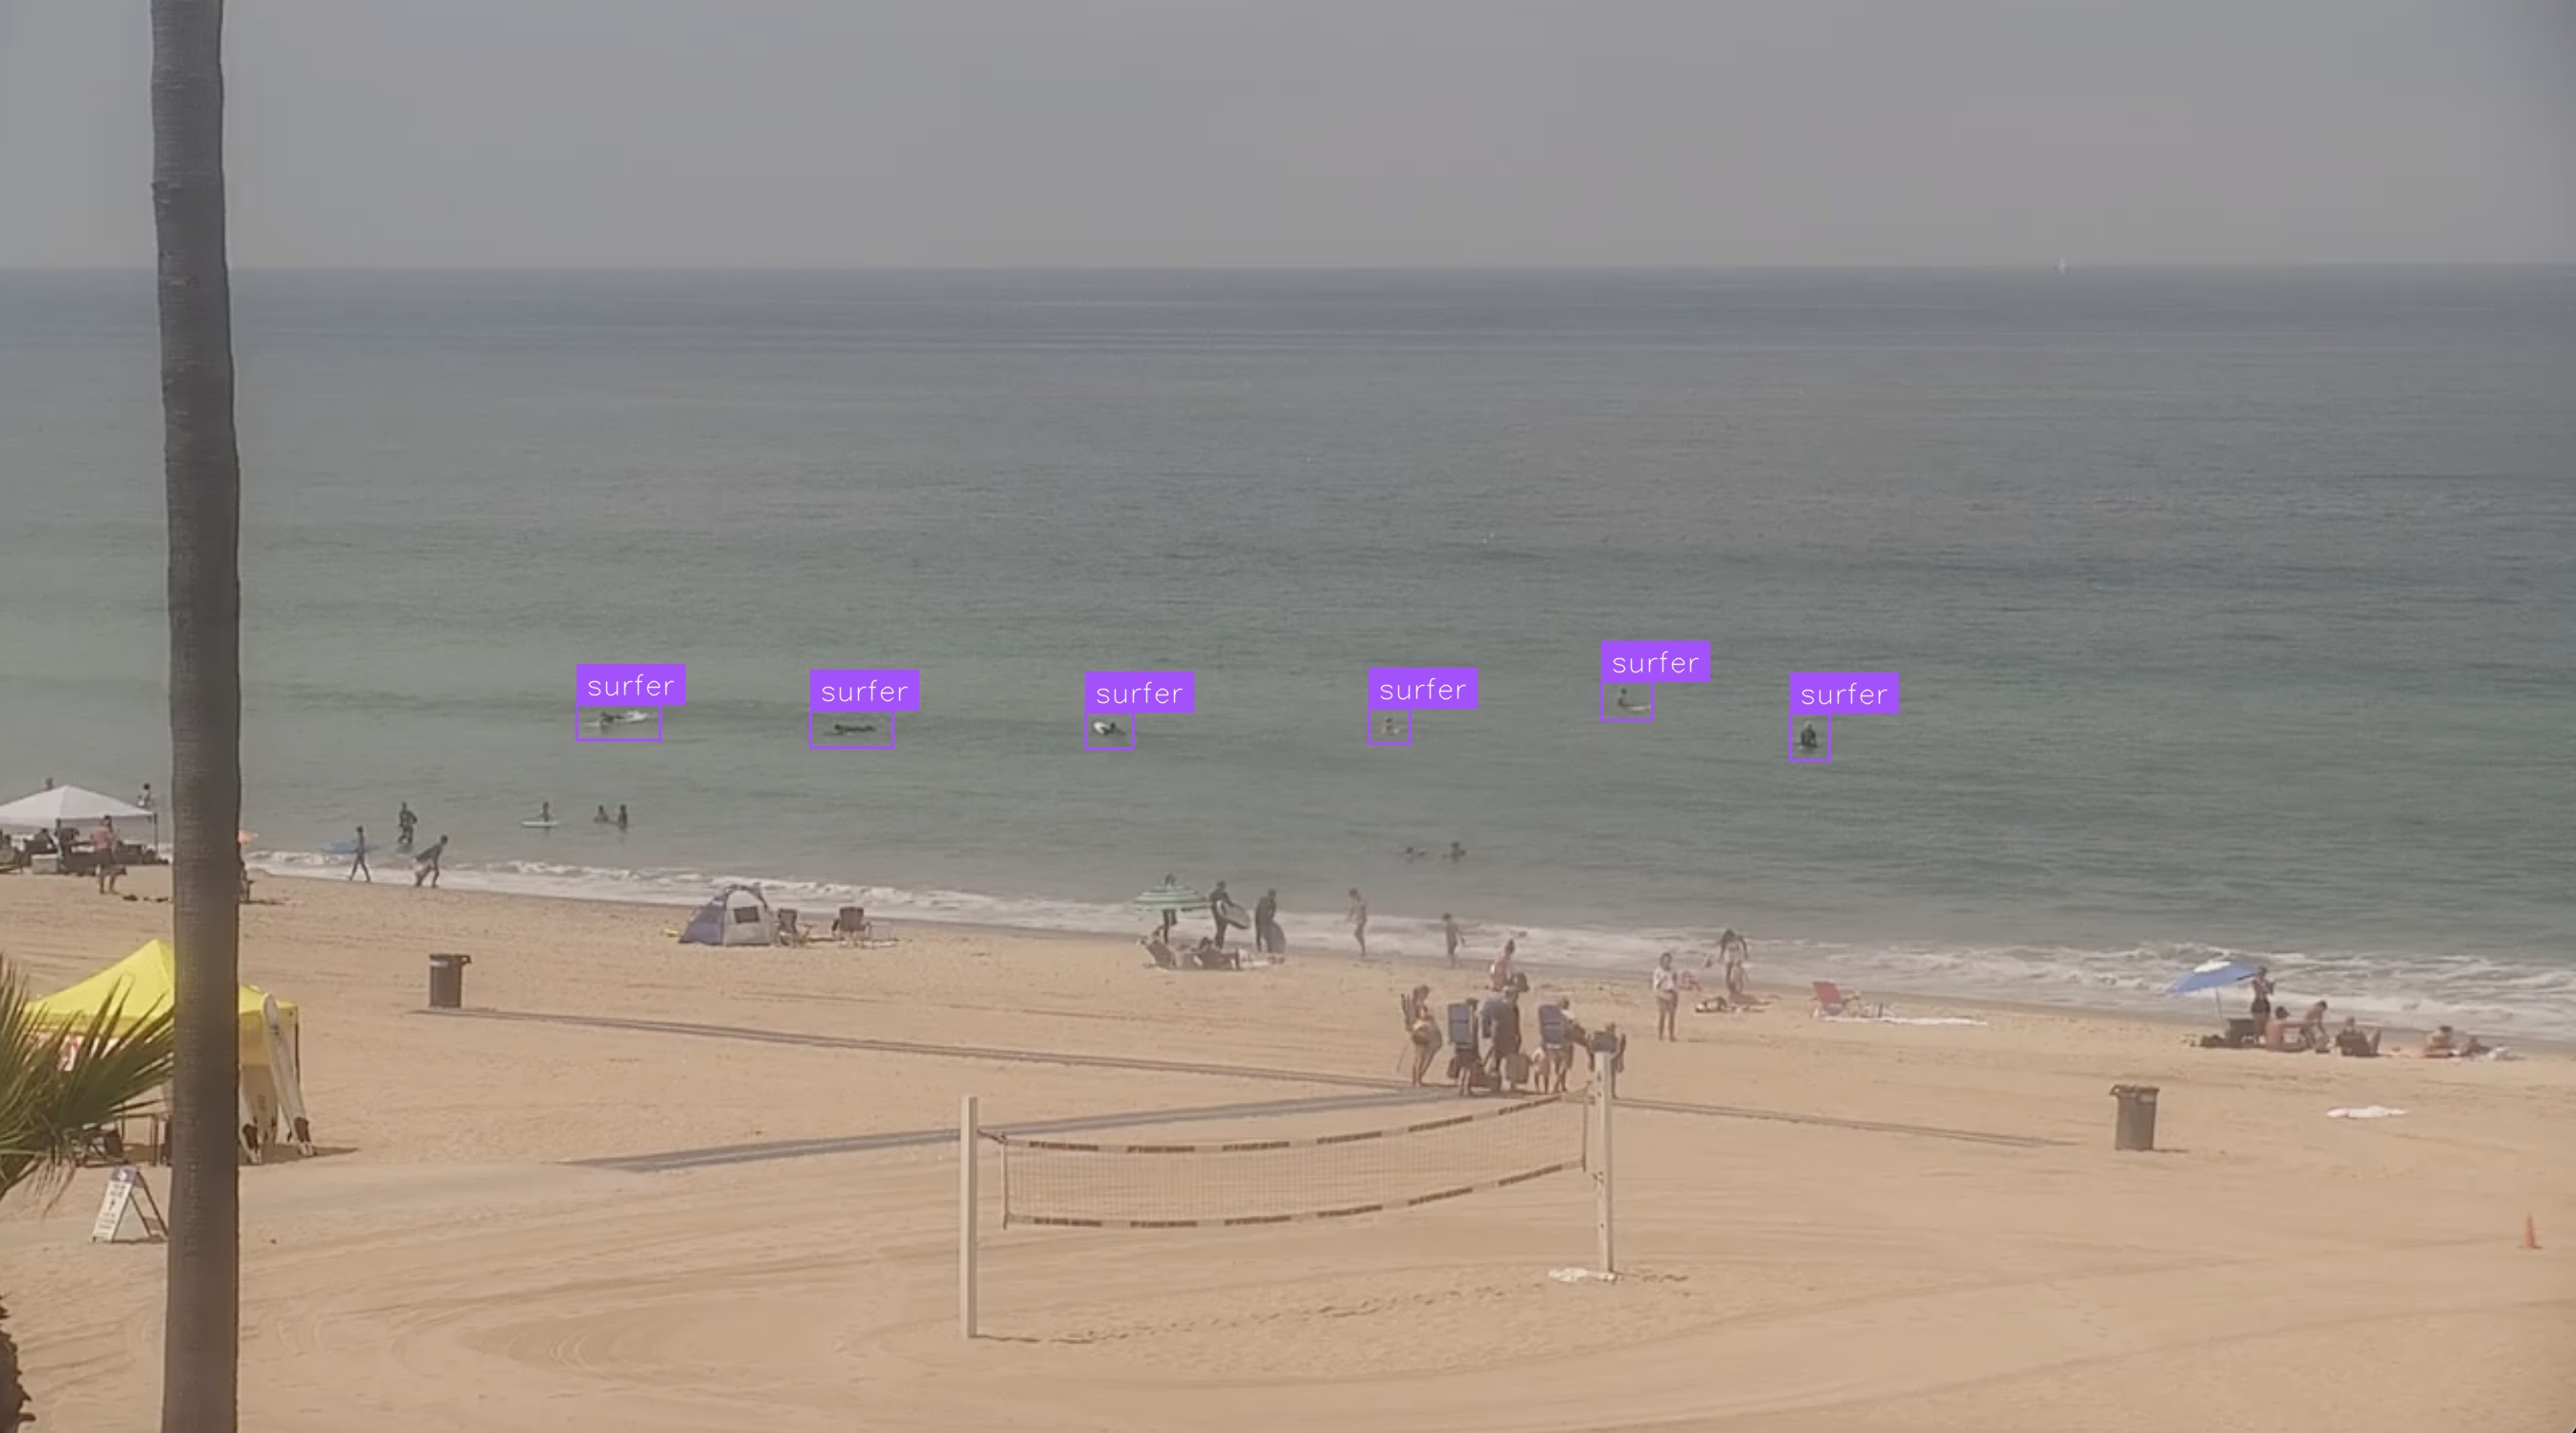

In [4]:
# Decode and display the image
import base64
from PIL import Image
from IPython.display import display
from io import BytesIO

output_image_data = base64.b64decode(outputs[0]["output_image"])

image = Image.open(BytesIO(output_image_data))

display(image)

In [7]:
# Show the count output
print(f"There are {outputs[0]["count_objects"]} surfers in the image")

There are 6 surfers in the image


Looks like the model captured the surfers!